# Sign Language Detection 0 and 1

## Artifical Neural Network Implementation

## Necessesary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Dataset Import

In [2]:
x_l = np.load("Dataset/X.npy")
y_l = np.load("Dataset/Y.npy")

In [3]:
img_size = 64

## Overview to Dataset

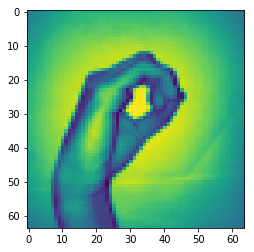

In [4]:
plt.imshow(x_l[260].reshape(img_size, img_size));

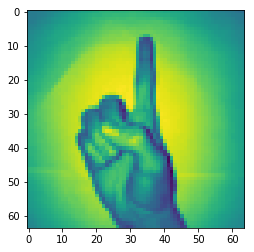

In [5]:
plt.imshow(x_l[900].reshape(img_size, img_size));

## Concatenate Just 0 or 1 Labels and Images

In [6]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis = 0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0],1)
print("X shape ", X.shape)
print("Y shape ", Y.shape)

X shape  (410, 64, 64)
Y shape  (410, 1)


## Dataset Train Test Split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

## Data Flatten

In [8]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]* X_test.shape[2])

print("X train flatten ", X_train_flatten.shape)
print("X test flatten ", X_test_flatten.shape)

X train flatten  (348, 4096)
X test flatten  (62, 4096)


## Transpose after Flatten

In [9]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train ", x_train.shape)
print("x test ", x_test.shape)
print("y train ", y_train.shape)
print("y test ",y_test.shape)

x train  (4096, 348)
x test  (4096, 62)
y train  (1, 348)
y test  (1, 62)


# 2 Layer Network Implementation

## Sigmoid Function

In [22]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

## Initialize Parameters and Layer Sizes NN

In [10]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

## Forward Propagation NN

In [11]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Compute Cost

In [12]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

## Backward Propagation NN

In [13]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

## Update Parameters NN

In [14]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

## Predict NN

In [15]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

## Final Function for ANN (2 Layer)

In [23]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

## Run All the Functions

In [ ]:
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [19]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

# ANN with Keras

### Necessesary Libraries for ANN

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

### Build Classifier

In [29]:
def build_classifier():
    
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

### Classifier and Accuracies

In [33]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)

Epoch 1/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6925 - acc: 0.5431
Epoch 2/100
232/232 [==============================] - 0s 82us/step - loss: 0.6877 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 82us/step - loss: 0.6868 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 86us/step - loss: 0.6857 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 82us/step - loss: 0.6826 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 86us/step - loss: 0.6790 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 82us/step - loss: 0.6749 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 86us/step - loss: 0.6673 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 86us/step - loss: 0.6590 - acc: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 86us/step - loss: 0.6460 - acc: 0.5431
Epoch 11/100
232/232 [========

232/232 [==============================] - 0s 86us/step - loss: 0.1464 - acc: 0.9784
Epoch 85/100
232/232 [==============================] - 0s 86us/step - loss: 0.1515 - acc: 0.9741
Epoch 86/100
232/232 [==============================] - 0s 78us/step - loss: 0.1500 - acc: 0.9741
Epoch 87/100
232/232 [==============================] - 0s 82us/step - loss: 0.1382 - acc: 0.9784
Epoch 88/100
232/232 [==============================] - 0s 78us/step - loss: 0.1357 - acc: 0.9828
Epoch 89/100
232/232 [==============================] - 0s 82us/step - loss: 0.1466 - acc: 0.9741
Epoch 90/100
232/232 [==============================] - 0s 78us/step - loss: 0.1391 - acc: 0.9828
Epoch 91/100
232/232 [==============================] - 0s 82us/step - loss: 0.1356 - acc: 0.9784
Epoch 92/100
232/232 [==============================] - 0s 82us/step - loss: 0.1307 - acc: 0.9828
Epoch 93/100
232/232 [==============================] - 0s 91us/step - loss: 0.1253 - acc: 0.9784
Epoch 94/100
232/232 [===========

232/232 [==============================] - 0s 78us/step - loss: 0.0450 - acc: 0.9957
Epoch 68/100
232/232 [==============================] - 0s 82us/step - loss: 0.0588 - acc: 0.9871
Epoch 69/100
232/232 [==============================] - 0s 82us/step - loss: 0.0370 - acc: 0.9914
Epoch 70/100
232/232 [==============================] - 0s 78us/step - loss: 0.0368 - acc: 0.9914
Epoch 71/100
232/232 [==============================] - 0s 82us/step - loss: 0.0379 - acc: 0.9914
Epoch 72/100
232/232 [==============================] - 0s 82us/step - loss: 0.0357 - acc: 0.9957
Epoch 73/100
232/232 [==============================] - 0s 82us/step - loss: 0.0373 - acc: 0.9914
Epoch 74/100
232/232 [==============================] - 0s 82us/step - loss: 0.0345 - acc: 0.9914
Epoch 75/100
232/232 [==============================] - 0s 91us/step - loss: 0.0346 - acc: 0.9957
Epoch 76/100
232/232 [==============================] - 0s 82us/step - loss: 0.0430 - acc: 0.9957
Epoch 77/100
232/232 [===========

232/232 [==============================] - 0s 86us/step - loss: 0.2841 - acc: 0.9440
Epoch 51/100
232/232 [==============================] - 0s 91us/step - loss: 0.2697 - acc: 0.9655
Epoch 52/100
232/232 [==============================] - 0s 86us/step - loss: 0.2672 - acc: 0.9698
Epoch 53/100
232/232 [==============================] - 0s 91us/step - loss: 0.2601 - acc: 0.9784
Epoch 54/100
232/232 [==============================] - 0s 78us/step - loss: 0.2675 - acc: 0.9353
Epoch 55/100
232/232 [==============================] - 0s 78us/step - loss: 0.2733 - acc: 0.9612
Epoch 56/100
232/232 [==============================] - 0s 82us/step - loss: 0.2742 - acc: 0.9397
Epoch 57/100
232/232 [==============================] - 0s 78us/step - loss: 0.2572 - acc: 0.9612
Epoch 58/100
232/232 [==============================] - 0s 78us/step - loss: 0.2433 - acc: 0.9741
Epoch 59/100
232/232 [==============================] - 0s 78us/step - loss: 0.2408 - acc: 0.9828
Epoch 60/100
232/232 [===========

### Mean and Variance

In [34]:
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.9454022961101313
Accuracy variance: 0.021503777169389813
